## EE 242 Lab 4 – Digital Filtering

Ethan Jiang, Jizhe Lian, Jasper Chen 

(This should be a markup cell, which means that when you run it you just get formated text.)

In [1]:
from scipy.io import wavfile as wav
import numpy as np
import matplotlib.pyplot as plt
import simpleaudio as sa
import decimal
import math
from scipy import signal as sig
%matplotlib inline

## Summary

In this lab, we will consider different types of digital filters (specifically discrete-time, linear, 
time-invariant filters) and look at their characterization in both time and frequency.

## Lab 4 turn in checklist

•	Pre-lab (upload to canvas before lab)

•	Lab 4 Jupyter notebook with code for the first 4 exercises assignment in separate cells. Each assignment cell should contain markdown cells (same as lab overview cells) for the responses to lab report questions. Include your lab members’ names at the top of the notebook.

•	1 individual Jupyter notebook with code + markdown cells for the last exercise

Note: The pre-lab should be done individually, and all other assignments should be completed in groups of 2-3 people.


## Assignment 1 -- Different Filter Implementations


In [2]:
# Part A

def plot_mag_freq_response(b, a, plot_phase = 0, fs = 0):
    # plot_phase and fs are 0 by default, feel free to change the default values
    # If plot_phase is 0, do not plot the phase response, else plot the phase response
    # If fs is 0, the x axis would be in radians, otherwise it would be in Hz based on the sampling frequency provided
    # Use signal.freqz to get your frequency response
    w, hf = sig.freqz(b, a)
    if (fs != 0):
        w = w*fs/(2*np.pi)
    
    fig = plt.figure(1, figsize=(10,5))
    plt.subplot(121)
    plt.plot(w, 20 * np.log10(np.abs(hf)))
    plt.title('HdB vs freq')
    plt.ylim(-100, 0)
    if (fs == 0):
        plt.xlabel('freq,radians')
    else:
        plt.xlabel('freq,Hz')
    plt.ylabel('HdB')
    
    if (plot_phase == 1):
        plt.subplot(122)
        plt.plot(w, np.rad2deg(np.unwrap(np.angle(hf))))
        plt.title('phase angle vs freq')
        if (fs == 0):
            plt.xlabel('freq,radians')
        else:
            plt.xlabel('freq,Hz')
        plt.ylabel('angle')
    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
    plt.show()

In [3]:
# Part B
# Hint: Use signal.lfilter 

def plot_impulse_response(b, a, x): #desire impulse response length
    ht = sig.lfilter(b, a, x)
    t = np.arange(len(ht))
    plt.stem(t, ht)
    plt.title('impulse_response')
    plt.xlabel('time(s)')
    plt.ylabel('magnitude')
    plt.show()
    return ht, t

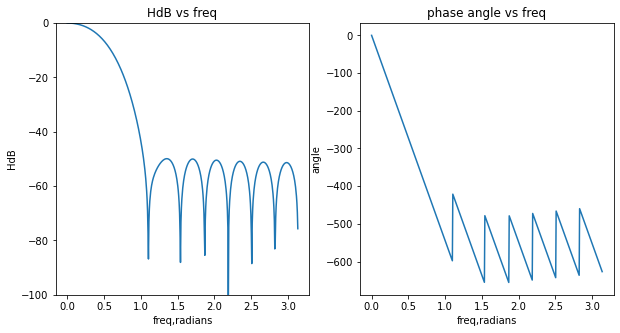

In [4]:
# Part C
# Use signal.firwin and signal.butter
#FIR:
b = sig.firwin(20, 0.15)
a = [1]
plot_mag_freq_response(b, a, plot_phase = 1, fs = 0)



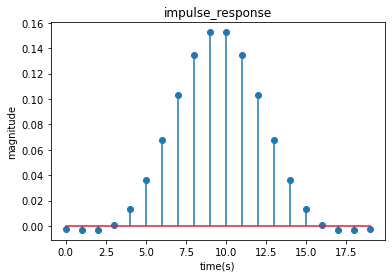

In [5]:
x = np.zeros(20)
x[0] = 1
ht_FIR, t_FIR = plot_impulse_response(b, a, x)

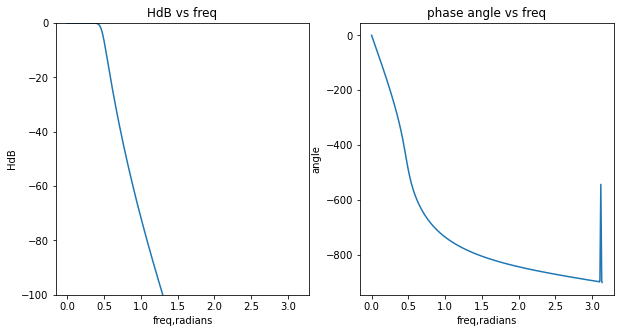

In [6]:
b,a = sig.butter(10, 0.15, 'lowpass')
plot_mag_freq_response(b, a, plot_phase = 1, fs = 0)

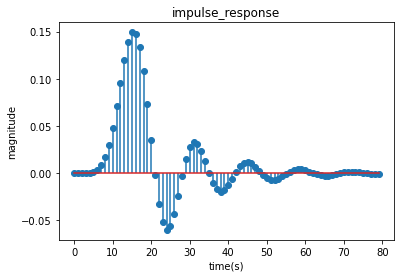

In [7]:
x = np.zeros(80)
x[0] = 1
ht_IIR, t_IIR = plot_impulse_response(b, a, x)

###  Discussion

Comment on the differences between the two filters in terms of the 
magnitude, phase and impulse responses.  What are the tradeoffs associated with these differences? 

In the FIR low pass filter, after the cutoff freq, the filter would still pass the signal but with a low magnitude. The phase angle graph forms a sharp triangle wave and bouncing up and down. The impulse response is like a sine wave with the edges more amd more approx to zero.

In the IIR filter, after the cutoff freq, the magnitude drops sharply, and does not pass any signal above the cutoff freq.

## Assignment 2 -- Different Filter Implementations for Smoothing Signals

time: [0.000e+00 1.000e-03 2.000e-03 ... 1.997e+00 1.998e+00 1.999e+00]
n 2000
[19.31698321 19.27271368 19.22844416 ... 12.49477251 12.49477251
 12.49477251]
2000


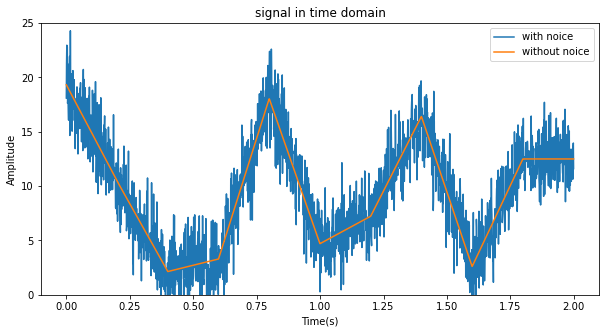

In [8]:
# Part A
# # Base and noise signal from lab 2
# p     = 10 # points for piecewise linear signal
# amp = 20   # amplitude range of base signal
# base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

# # create some random noise to be added to the abve base signals
# noiseamp = 2
# noise  = noiseamp * np.random.randn(n)

# Assignment 2 - Amplitude Operations on Signals

# Part A
# set up relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,2,1/srate) # associated time vector that corresponds to 2 seconds
print("time:",time)
n     = len(time) # length of the time vector
print("n", n)

# here is a base signal to work with, values of signal points chosen randomly
p   = 10 # points for piecewise linear signal
amp = 20   # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)
print(base)
print(len(base))
# create some random noise to be added to the abve base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

# add noise to the base signals to create new noisy signals
# TODO: Code that solves the rest of A
base_ns = np.add(noise, base)

fig = plt.figure(5, figsize=(10,5))
# plot parameter set 1
plt.plot(time, base_ns, label='with noice')
plt.plot(time, base, label='without noice')
plt.title('signal in time domain')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.ylim(0,25)
plt.legend()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

2020 2000


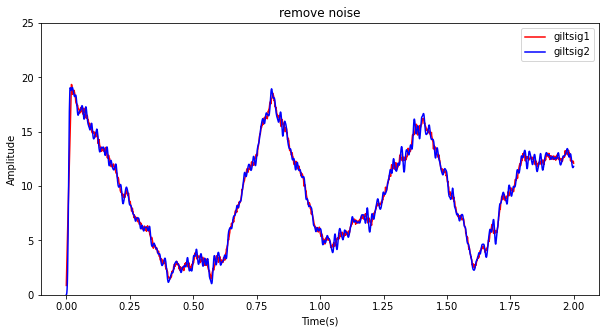

In [9]:
# Part B
# Use signal.lfilter to apply your filter
# window
hfilt = np.ones(2*10+1) # k=10 length N
hfilt = hfilt * (1/21) #1/N
filtsig1 = np.convolve(base_ns, hfilt)
# lfilter
b1 = sig.firwin(20, 0.10)
a1 = [1]
filtsig2 = sig.lfilter(b1, a1, base_ns)
print(len(filtsig1), len(filtsig2))

# print(filtsig2, len(filtsig2))
time  = np.arange(0,2.02,1/srate)
time2  = np.arange(0,2,1/srate)

fig = plt.figure(6, figsize=(10,5))
# plot 
plt.plot(time[:-20], filtsig1[:-20], color='red', label = 'giltsig1')
plt.plot(time2, filtsig2, color='blue', label = 'giltsig2')
#plt.plot(time, filtsig2[40:])
plt.title('remove noise')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.legend()
plt.ylim(0,25)
plt.show()

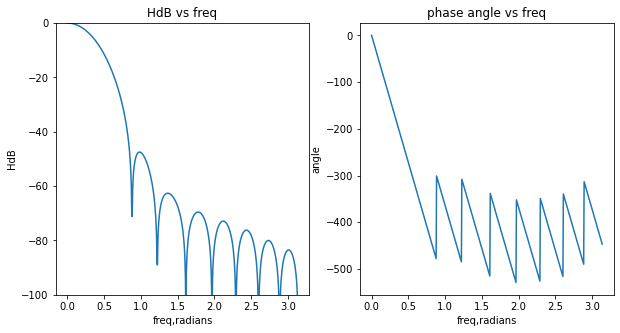

In [10]:
# Part C
plot_mag_freq_response(b1, a1, plot_phase = 1, fs = 0)

###  Discussion

The moving window average (and its causal version) is an FIR filter, so 
the phase should be linear. How might the result change if you used a Butterworth filter?

with a Butterworth filter, the phase response would be non-linear, however, the graph of phase before the critical freq is pretty similar, and we also can ignore the high freq part because the mag of high freq is low. Therefore high freq phase would not cause any difference, and the final result won't change. 

## Assignment 3 -- Filtering an Audio Signal

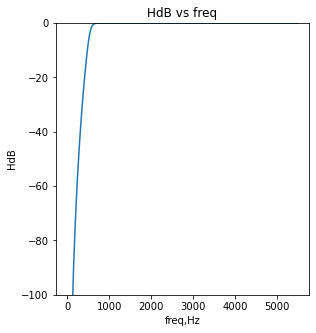

In [11]:
# Part A
# Recall the use of numpy.fft.fft from the previous lab
fs_horn, mag_horn = wav.read('horn11short.wav')
W=550*2/11025.
b3, a3 = sig.butter(8, W,"highpass")
plot_mag_freq_response(b3, a3, plot_phase = 0, fs = fs_horn)

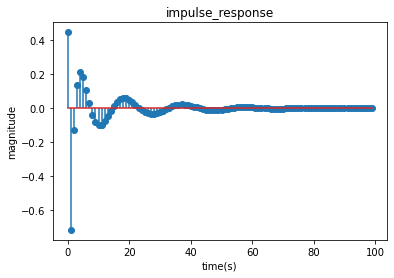

In [12]:
x = np.zeros(100)
x[0] = 1
ht_FIR, t_FIR = plot_impulse_response(b3, a3, x)

In [13]:
filt_mag_horn = sig.lfilter(b3, a3, mag_horn)
print(len(mag_horn), len(filt_mag_horn))

x_1 = mag_horn[:512]
x_2 = filt_mag_horn[:512]

wav.write('after_filter_horn.wav', fs_horn, filt_mag_horn.astype('int16'))

10034 10034


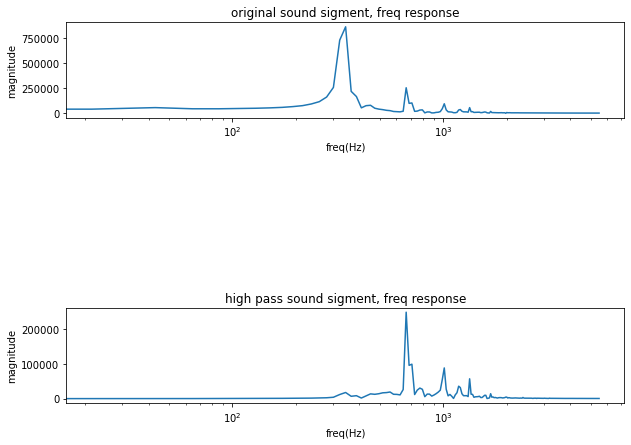

In [14]:
# individual work

x_1_xhf = np.fft.fft(x_1)
x_1_xhf2 = np.fft.fftshift(x_1_xhf)
x_1_xhf2 = np.abs(x_1_xhf2)
x_1_positive = x_1_xhf2[256:]

x_2_xhf = np.fft.fft(x_2)
x_2_xhf2 = np.fft.fftshift(x_2_xhf)
x_2_xhf2 = np.abs(x_2_xhf2)
x_2_positive = x_2_xhf2[256:]

w_x = np.arange(0,256,1)*fs_horn/512

fig = plt.figure(1, figsize=(10,7))

plt.subplot(211) 
plt.plot(w_x, x_1_positive)
plt.title('original sound sigment, freq response')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')
plt.xscale('log')

plt.subplot(212) 
plt.plot(w_x, x_2_positive)
plt.title('high pass sound sigment, freq response')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')
plt.xscale('log')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

In [15]:
wav_obj_orig = sa.WaveObject.from_wave_file('horn11short.wav')
wav_obj_filt = sa.WaveObject.from_wave_file('after_filter_horn.wav')

wav_obj_orig.play().wait_done()
wav_obj_filt.play().wait_done()


In [16]:
# Part B
srate = fs_horn # sampling rate in Hz
time  = np.arange(0,0.8,1/srate) # associated time vector that corresponds to 2 seconds
n     = len(time) # length of the time vector

# here is a base signal to work with, values of signal points chosen randomly
base = mag_horn[:8820]
# create some random noise to be added to the abve base signals
noiseamp = 1000
noise  = noiseamp * np.random.randn(n)
print(len(mag_horn))

# add noise to the base signals to create new noisy signals
# TODO: Code that solves the rest of A
base_ns = np.add(noise, base)

# fig = plt.figure(5, figsize=(10,5))
# plot parameter set 1
# plt.plot(time, base_ns, label='with noice')
# plt.plot(time, base, label='without noice')
# plt.title('signal in time domain')
# plt.xlabel('Time(s)')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
# plt.show()

10034


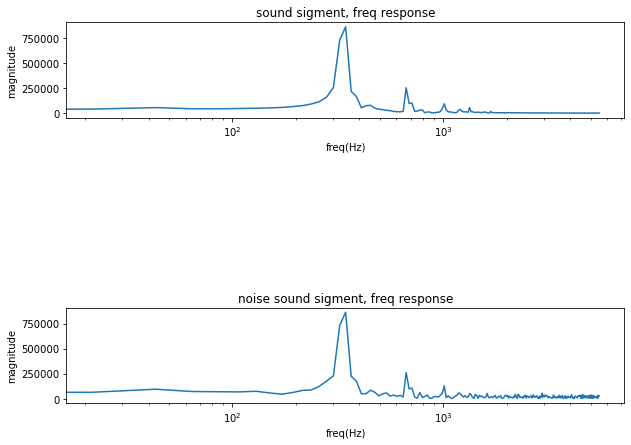

In [17]:
# individual work
x_1 = base[:512]
x_2 = base_ns[:512]



x_1_xhf = np.fft.fft(x_1)
x_1_xhf2 = np.fft.fftshift(x_1_xhf)
x_1_xhf2 = np.abs(x_1_xhf2)
x_1_positive = x_1_xhf2[256:]

x_2_xhf = np.fft.fft(x_2)
x_2_xhf2 = np.fft.fftshift(x_2_xhf)
x_2_xhf2 = np.abs(x_2_xhf2)
x_2_positive = x_2_xhf2[256:]

w_x = np.arange(0,256,1)*fs_horn/512

fig = plt.figure(1, figsize=(10,7))

plt.subplot(211) 
plt.plot(w_x, x_1_positive)
plt.title('sound sigment, freq response')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')
plt.xscale('log')

plt.subplot(212) 
plt.plot(w_x, x_2_positive)
plt.title('noise sound sigment, freq response')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')
plt.xscale('log')


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()



In [18]:
wav.write('noice_horn.wav', fs_horn, base_ns.astype('int16'))
wav_obj_noise = sa.WaveObject.from_wave_file('noice_horn.wav')
wav_obj_noise.play()

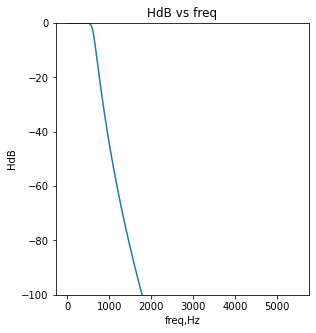

In [19]:
# Part C
fs_horn, mag_horn = wav.read('horn11short.wav')
W=100*2/1800
b4, a4 = sig.butter(10, W,"lowpass")
plot_mag_freq_response(b4, a4, plot_phase = 0, fs = fs_horn)

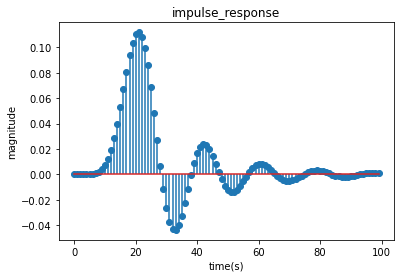

In [20]:
x = np.zeros(100)
x[0] = 1
ht_FIR, t_FIR = plot_impulse_response(b4, a4, x)

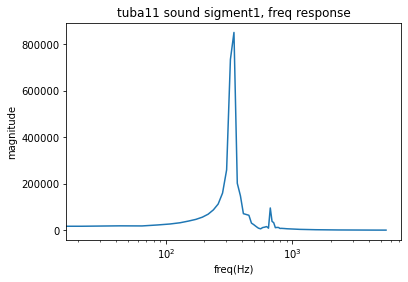

In [21]:
filt_mag_horn = sig.lfilter(b4, a4, mag_horn)
x_1 = filt_mag_horn[:512]

x_1_xhf = np.fft.fft(x_1)
x_1_xhf2 = np.fft.fftshift(x_1_xhf)
x_1_xhf2 = np.abs(x_1_xhf2)
x_1_positive = x_1_xhf2[256:]

w_x = np.arange(0,256,1)*fs_horn/512

plt.plot(w_x, x_1_positive)
plt.title('tuba11 sound sigment1, freq response')
plt.xlabel('freq(Hz)')
plt.ylabel('magnitude')
plt.xscale('log')



plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()

###  Discussion

In part A, filtering out the first harmonic of the horn signal reduces the 
loudness, but it doesn’t change the perceived note.  Explain why this is. Discuss the 
differences in the impulse responses of the HPF and LPF.

From the graph, we can see the low freq has a outstanding magnitude, and by using the filter, we reduce the magnitude which also reduce the loudness. The pitch of two sound are close because high freq note plays a more significant job to determine the pitch in this sound. 

In the high pass filter, the magnitude reachs the max in the beginning. In the low pass filter, the magnitude starts with 0 and increase to it maximum. I think this is because there is a shift in freq from a high pass filter to a low pass filter. 

## Assignment 4 -- Implementing a 3-Band Audio Equalizer

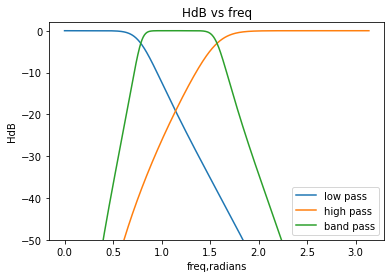

In [22]:
# Part A
W1 = 1/4
W2 = 1/2
W3 = [1/4, 1/2]

b_l,a_l = sig.butter(5, W1, 'lowpass')
b_h,a_h = sig.butter(5, W2, 'highpass')
b_b,a_b = sig.butter(5, W3, 'bandpass')

w_l, hf_l = sig.freqz(b_l, a_l)
w_h, hf_h = sig.freqz(b_h, a_h)
w_b, hf_b = sig.freqz(b_b, a_b)
w_b = w_b[1:]
hf_b = hf_b[1:]
plt.plot(w_l, 20 * np.log10(np.abs(hf_l)), label='low pass')
plt.plot(w_h, 20 * np.log10(np.abs(hf_h)), label='high pass')
plt.plot(w_b, 20 * np.log10(np.abs(hf_b)), label='band pass')
plt.title('HdB vs freq')
plt.ylim(-50, 2)
plt.xlabel('freq,radians')
plt.ylabel('HdB')
plt.legend() 
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2)
plt.show()


In [23]:
# Part B
def audio_equalizer(audio, G1, G2, G3):
    # Note that G1, G2, G3 are in dB
    g1 = 10**(G1/20) # to linear
    g2 = 10**(G2/20)
    g3 = 10**(G3/20)
    
    filt_mag_horn_l = sig.lfilter(b_l, a_l, audio)*g1
    filt_mag_horn_b = sig.lfilter(b_b, a_b, audio)*g2
    filt_mag_horn_h = sig.lfilter(b_h, a_h, audio)*g3

    # Return your output here
    return filt_mag_horn_l + filt_mag_horn_b + filt_mag_horn_h

In [24]:
# Part C
fs_mus, mag_mus = wav.read('music.wav')
mag_mus = mag_mus[:,0]
filt_music = audio_equalizer(mag_mus, 0, 0, 0)

wav.write('music_origin.wav', fs_mus, mag_mus.astype('int16'))
wav.write('music_filt.wav', fs_mus, filt_music.astype('int16'))
wav_obj_origin = sa.WaveObject.from_wave_file('music_origin.wav')
wav_obj_filt = sa.WaveObject.from_wave_file('music_filt.wav')
wav_obj_origin.play().wait_done()
wav_obj_filt.play()
# sound same

In [25]:
# Part D
filt_music1 = audio_equalizer(mag_mus, 0, -40, -40)
filt_music2 = audio_equalizer(mag_mus, -40, 0, 0)
wav.write('music_filt1.wav', fs_mus, filt_music1.astype('int16'))
wav.write('music_filt2.wav', fs_mus, filt_music2.astype('int16'))
music_filt1 = sa.WaveObject.from_wave_file('music_filt1.wav')
music_filt2 = sa.WaveObject.from_wave_file('music_filt2.wav')
music_filt1.play().wait_done()
music_filt2.play()

### Discussion

Discuss what types of gains lead to an audible difference. Are there any 
constraints you need to put on the gains?

For this music, a low pass filter would make no much differece much almost every music signal is low freq. And by using a low pass filter the music would be samilar to the orginal sound. However, if using a low reject filter, we cannot hear most of the sound, and the only sound that distinguishable is the drum sound that has a high freq. 